In [1]:
import importlib
import time
import pandas as pd
import numpy as np
import datetime
import shutil

from MERFISH_Objects.execute_class import *

# from dredFISH.Utils.__init__plots import *
import logging
logging.basicConfig(format='%(asctime)s - %(message)s', 
                    datefmt='%m-%d %H:%M:%S', 
                    level=logging.INFO,
                    )

2022-08-26 11:19:05,353 [INFO] WRITING LOG OUTPUT TO /home/fangming/.cellpose/run.log


In [2]:
def savefig(fig, path):
    """
    """
    fig.savefig(path, bbox_inches='tight', dpi=300)
    return 

def savefig_autodate(fig, path):
    """
    """
    today = datetime.today().date()
    suffix = path[-3:]
    assert suffix in ['pdf', 'png', 'jpg']
    path = path.replace(f'.{suffix}', f'_{today}.{suffix}')
    savefig(fig, path)
    print(f"saved the figure to: {path}")
    return 

def plot_image_with_zoom(img, x_window, y_window, vmin_p=0, vmax_p=100, title='', output=None):
    """
    """
    vmin,vmax = np.percentile(img.ravel(),[vmin_p, vmax_p])

    fig, axs = plt.subplots(1, 2, figsize=(10*2,10*1))
    for ax in axs:
        ax.set_title(title)
        g = ax.imshow(img,vmin=vmin,vmax=vmax,cmap='jet')

    ax = axs[0]
    ax.hlines(y_window, xmin=x_window[0], xmax=x_window[1], color='white')
    ax.vlines(x_window, ymin=y_window[0], ymax=y_window[1], color='white')

    ax = axs[1]
    ax.set_xlim(x_window)
    ax.set_ylim(y_window)
    fig.colorbar(g, shrink=0.5, ax=ax)
    if output is not None:
        savefig_autodate(fig, output)
    plt.show()

In [3]:
### input
figdir = '/bigstore/GeneralStorage/fangming/projects/test_merfish/figures'
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/C0_2022Jul25/'
cword_config = 'merfish_config_zebrafinch_18bits_C0July25'
config = importlib.import_module(cword_config)

overwrite = False

In [4]:
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
parameters = config.parameters
fishdata_path = os.path.join(metadata_path, parameters['fishdata'])
utilities_path = parameters['utilities_path']
bitmap = config.bitmap

for key in parameters:
    if key.endswith('path') or key.endswith('data'):
        print(key, parameters[key])
        
nuclei = [i for i in os.listdir(metadata_path) if 'nucstain' in i][-1]
print(nuclei)
hybe1 = [i for i in os.listdir(metadata_path) if 'hybe1_' in i][-1]
print(hybe1)

image_metadata_nuc = Metadata(os.path.join(metadata_path, nuclei))
print(image_metadata_nuc.posnames.shape)
image_metadata = Metadata(os.path.join(metadata_path, hybe1))
print(image_metadata.posnames.shape)

posnames = image_metadata_nuc.posnames

x_window = [500,750]
y_window = [1000,1250]

daemon_path /scratch/test_daemon_FX_18bits_C0July25
utilities_path /scratch/test_utility_FX_18bits_C0July25
fishdata fishdata_testFX_18bits
nucstain_26
hybe1_1
(150,)
(150,)


# commit to 1 pos

In [5]:
posname = '6-Pos004_003'
# # need to clean up temporary folder
# if overwrite:
#     try:
#         shutil.rmtree(fishdata_path)
#     except Exception as e:
#         print(e)
#     try:
#         shutil.rmtree(utilities_path)
#     except Exception as e:
#         print(e)

2022-08-26 11:19:07,511 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig1-1_dapi_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig1-1_dapi_C0_2022Jul25_6-Pos004_003_2022-08-26.pdf


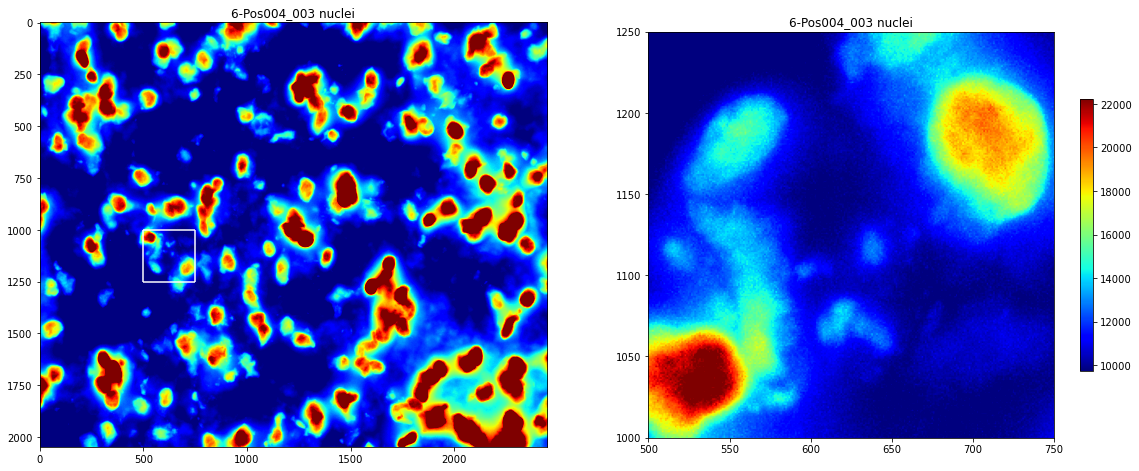

2022-08-26 11:19:15,838 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig1-2_polyT_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig1-2_polyT_C0_2022Jul25_6-Pos004_003_2022-08-26.pdf


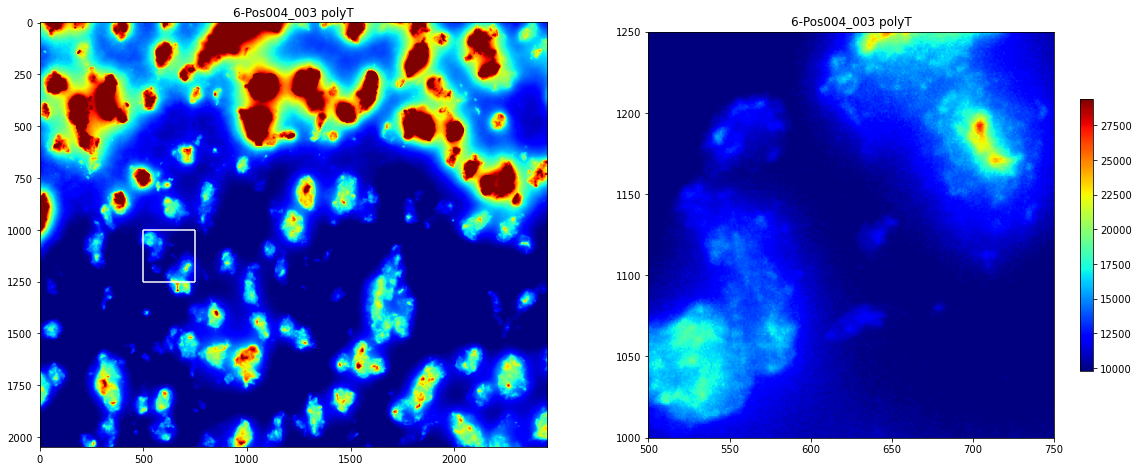

In [6]:
img_nuc = image_metadata_nuc.stkread(Position=posname, Channel='DeepBlue').max(2) # max across z?
output = os.path.join(figdir, f'fig1-1_dapi_{dataset}_{posname}.pdf')
logging.info(output)
plot_image_with_zoom(img_nuc, x_window, y_window, vmin_p=25, vmax_p=95, title=posname+" nuclei", 
                     output=output,
                    )

img_poly = image_metadata_nuc.stkread(Position=posname, Channel='FarRed').max(2) # max across z?
output = os.path.join(figdir, f'fig1-2_polyT_{dataset}_{posname}.pdf')
logging.info(output)
plot_image_with_zoom(img_poly, x_window, y_window, vmin_p=25, vmax_p=95, title=posname+" polyT",
                     output=output,
                    )

In [7]:
%%time
# init takes sometime; reload is fast
self = Dataset_Class(metadata_path, dataset, cword_config, verbose=True)
self.main()

11:19:20 Checking Imaging: 0it [00:00, ?it/s]
11:19:21 Checking Hot Pixel: 0it [00:00, ?it/s]
11:19:21 Checking Position Flags: 100%|██████████| 150/150 [00:00<00:00, 2062.50it/s]

CPU times: user 108 ms, sys: 33.2 ms, total: 142 ms
Wall time: 239 ms


In [8]:
def pfunc_reg(hybe, metadata_path, dataset, posname, cword_config):
    self = Registration_Class(metadata_path,dataset,posname,hybe,cword_config,verbose=False)
    self.find_beads()

def pfunc_img(data, metadata_path, dataset, posname, cword_config):
    hybe = data['hybe']
    channel = data['channel']
    zindex = data['zindex']
    self = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
    self.main()

In [9]:
pbar = tqdm(0)
def update(*a):
    """take whatever results from myfunc and don't care
    """
    pbar.update()

0it [00:00, ?it/s]

In [10]:
%%time
# takes some time
Input = [hybe for readout_probe,hybe,channel in bitmap if not hybe==parameters['ref_hybe']]
print(len(Input))
ncpu = min(len(Input), 10)

pool = multiprocessing.Pool(ncpu)
pbar.reset()
pbar = tqdm(Input)
for i in Input:
    pool.apply_async(pfunc_reg, args=(i, metadata_path, dataset, posname, cword_config), callback=update)
pool.close()
pool.join()

17


0it [00:00, ?it/s]
0it [00:00, ?it/s]/17 [00:00<?, ?it/s]

100%|██████████| 17/17 [03:18<00:00,  5.65s/it]

CPU times: user 140 ms, sys: 236 ms, total: 376 ms
Wall time: 3min 18s


In [11]:
%%time
Input = []
hybe = 'hybe2'
channel = 'FarRed'
self = Stack_Class(metadata_path,dataset,posname,hybe,channel,cword_config,verbose=False)
self.check_projection()
zindexes = self.zindexes
for readout_probe,hybe,channel in bitmap:
    for zindex in zindexes:
        data = {'hybe':hybe,'channel':channel,'zindex':zindex}
        Input.append(data)

ncpu = min(len(Input), 10)
pool = multiprocessing.Pool(ncpu)
pbar.reset()
pbar = tqdm(Input)
for i in Input:
    pool.apply_async(pfunc_img, args=(i, metadata_path, dataset, posname, cword_config), callback=update)
pool.close()
pool.join()


100%|██████████| 18/18 [03:54<00:00,  5.89s/it]

CPU times: user 126 ms, sys: 270 ms, total: 397 ms
Wall time: 3min 55s


In [12]:
%%time
zindex = str(zindexes[0])
# stks = {}
# raw_dapis = {}

rawimgs = {}
imgs = {}
spots_coords = {}
spots_coords_v2 = {}

for i, (readout,hybe,channel) in enumerate(bitmap):
    print(readout,hybe,channel)
    """ Processed Image Zoom"""
    # self = Image_Class(metadata_path,dataset,posname,hybe,'DeepBlue',zindex,cword_config,verbose=False)
    # self.load_data() # sub_stk
    # self.project() # max projection
    # raw_dapis[i] = self.img # are these correct?
    
    self = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
    self.load_data() # sub_stk
    # stks[i] = self.sub_stk
    self.project() # max projection
    rawimgs[i] = self.img
    
    fish_img = self.fishdata.load_data('image',
                                        dataset=self.dataset,
                                        posname=self.posname,
                                        hybe=self.hybe,
                                        channel=self.channel,
                                        zindex=self.zindex)/self.parameters['gain']
    imgs[i] = fish_img
    self.img = fish_img # trying this and see; this is important
    
    self.parameters['spot_max_distance'] = 3#self.parameters['spot_parameters']['default']['spot_max_distance']
    self.parameters['spot_minmass'] = 5#self.parameters['spot_parameters']['default']['spot_minmass']
    self.parameters['spot_diameter'] = 5#self.parameters['spot_parameters']['default']['spot_diameter']
    self.parameters['spot_separation'] = 3#self.parameters['spot_parameters']['default']['spot_separation']
    self.call_spots()
    spots_coords[i] = np.vstack([self.spots.x, self.spots.y]).T

    self.parameters['spot_max_distance'] = 3#self.parameters['spot_parameters']['default']['spot_max_distance']
    self.parameters['spot_minmass'] = 10#self.parameters['spot_parameters']['default']['spot_minmass']
    self.parameters['spot_diameter'] = 5#self.parameters['spot_parameters']['default']['spot_diameter']
    self.parameters['spot_separation'] = 3#self.parameters['spot_parameters']['default']['spot_separation']
    self.call_spots()
    spots_coords_v2[i] = np.vstack([self.spots.x, self.spots.y]).T

RS0095 hybe1 FarRed
RS0109 hybe2 FarRed
RS0175 hybe3 FarRed
RS0237 hybe4 FarRed
RS0307 hybe5 FarRed
RS0332 hybe6 FarRed
RS0384 hybe10 FarRed
RS0406 hybe11 FarRed
RS0451 hybe12 FarRed
RS0468 hybe13 FarRed
RS0548 hybe14 FarRed
RS64.0 hybe15 FarRed
RS156.0 hybe19 FarRed
RS278.0 hybe20 FarRed
RS313.0 hybe21 FarRed
RS643.0 hybe22 FarRed
RS740.0 hybe23 FarRed
RS810.0 hybe24 FarRed
CPU times: user 59.5 s, sys: 1min 2s, total: 2min 2s
Wall time: 2min 3s


2022-08-26 11:28:38,419 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig2-1_raw_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig2-1_raw_C0_2022Jul25_6-Pos004_003_2022-08-26.pdf


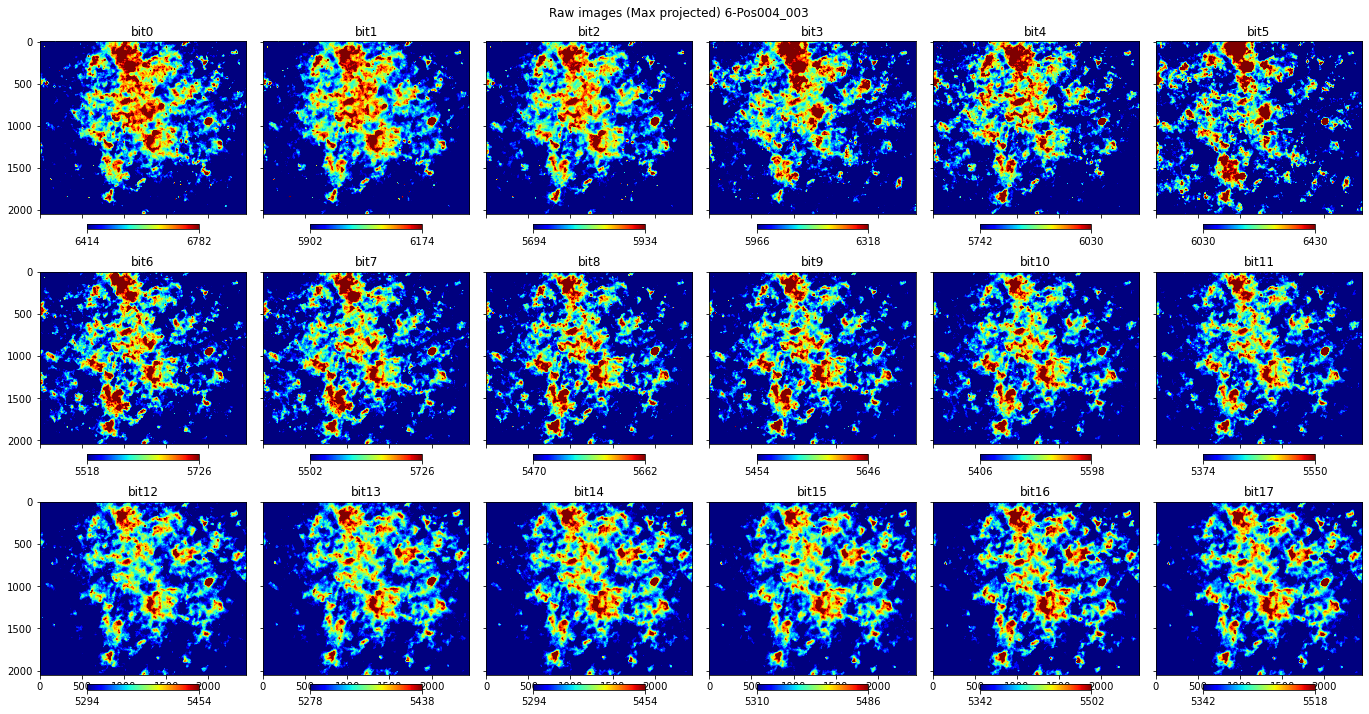

In [13]:
output = os.path.join(figdir, f'fig2-1_raw_{dataset}_{posname}.pdf')
logging.info(output)

fig, axs = plt.subplots(3,6,figsize=(4*6,4*3), sharex=True, sharey=True)
for i, ax in zip(rawimgs.keys(), axs.flat):
    img = rawimgs[i]
    vmin = np.percentile(img.reshape(-1,), 50)
    vmax = np.percentile(img.reshape(-1,), 95)
    g = ax.imshow(img, cmap='jet', vmin=vmin, vmax=vmax, rasterized=True)
    ax.set_aspect('equal')
    ax.set_title(f'bit{i}')
    fig.colorbar(g, ax=ax, shrink=0.5, location='bottom', pad=0.05, fraction=0.05, ticks=[vmin, vmax])
fig.subplots_adjust(wspace=0)
fig.suptitle(f"Raw images (Max projected) {posname}", y=0.92)
savefig_autodate(fig, output)
plt.show()

2022-08-26 11:29:09,803 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig2-2_proc_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig2-2_proc_C0_2022Jul25_6-Pos004_003_2022-08-26.pdf


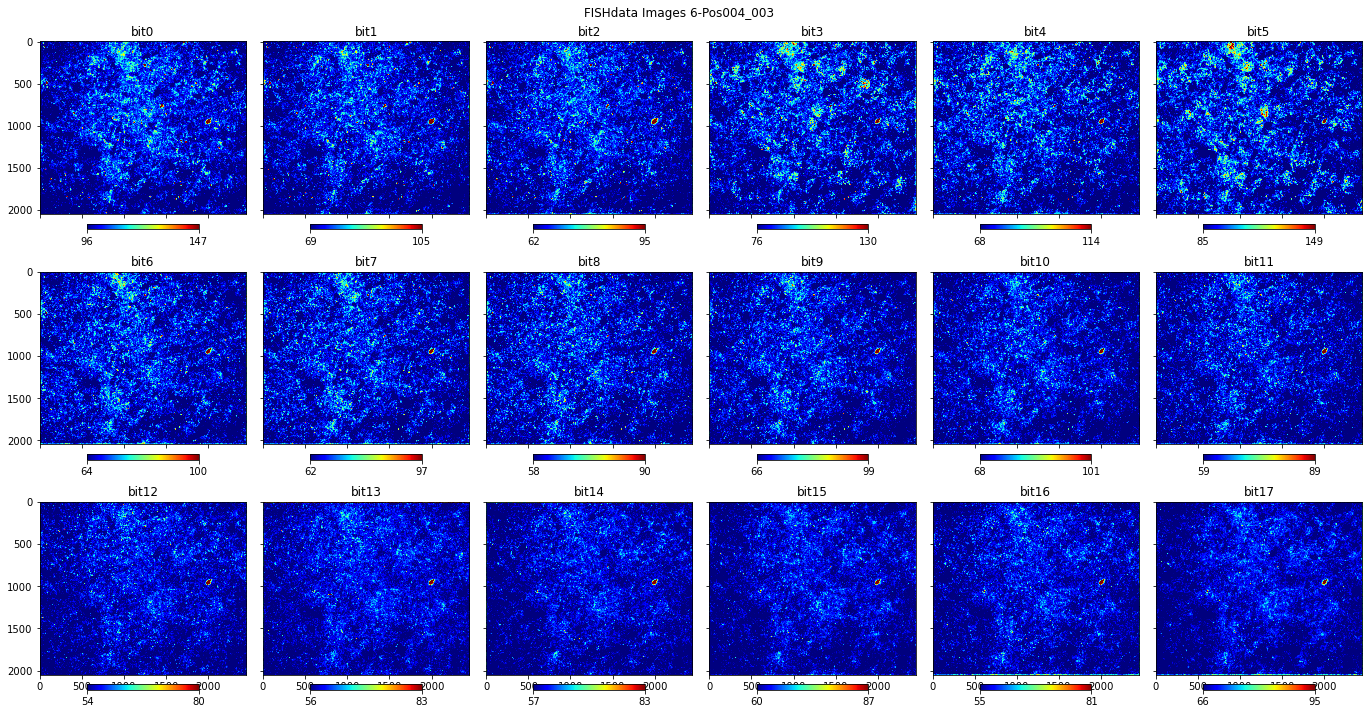

In [14]:
output = os.path.join(figdir, f'fig2-2_proc_{dataset}_{posname}.pdf')
logging.info(output)

fig, axs = plt.subplots(3,6,figsize=(4*6,4*3), sharex=True, sharey=True)
for i, ax in zip(imgs.keys(), axs.flat):
    img = imgs[i]
    vmin = np.percentile(img.reshape(-1,), 50)
    vmax = np.percentile(img.reshape(-1,), 95)
    g = ax.imshow(img, cmap='jet', vmin=vmin, vmax=vmax, rasterized=True)
    ax.set_aspect('equal')
    ax.set_title(f'bit{i}')
    fig.colorbar(g, ax=ax, shrink=0.5, location='bottom', pad=0.05, fraction=0.05, ticks=[vmin, vmax])
fig.subplots_adjust(wspace=0)
fig.suptitle(f"FISHdata Images {posname}", y=0.92)
savefig_autodate(fig, output)
plt.show()

2022-08-26 11:29:59,539 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig2-3_spots_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig2-3_spots_C0_2022Jul25_6-Pos004_003_2022-08-26.pdf


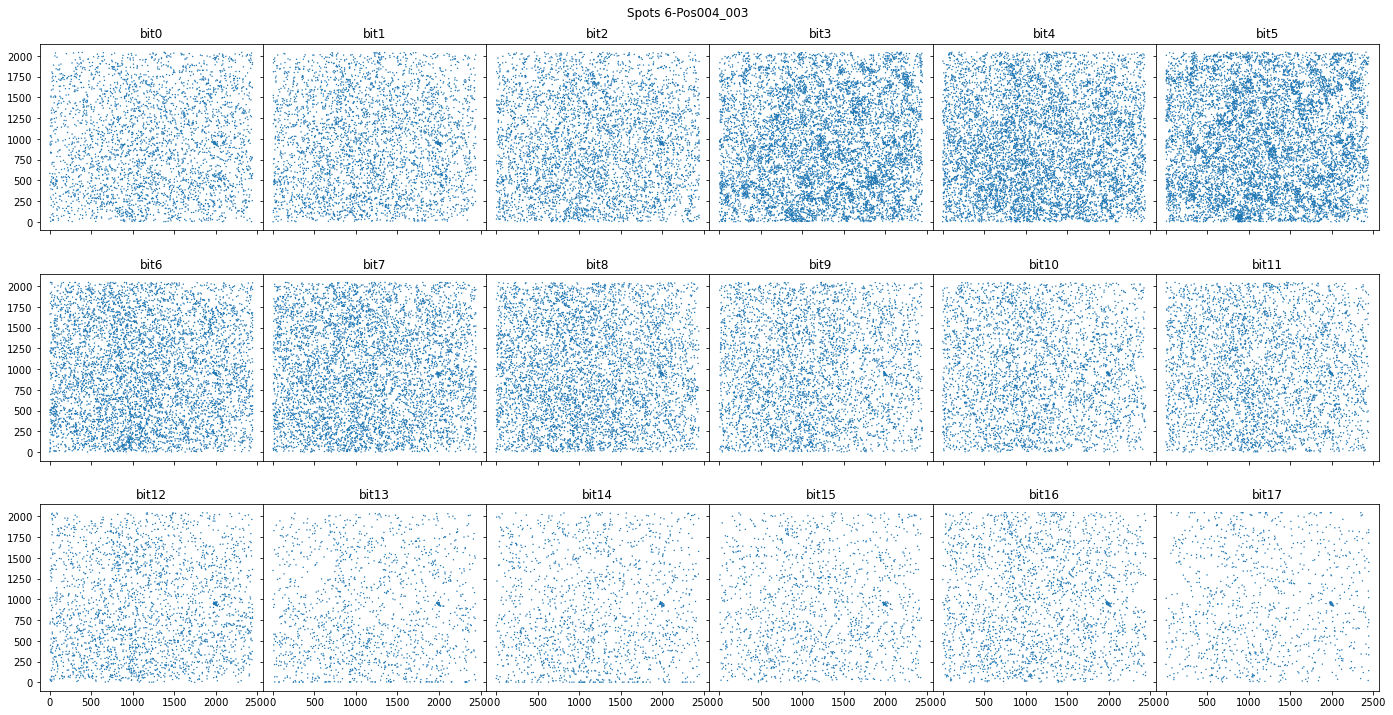

In [15]:
output = os.path.join(figdir, f'fig2-3_spots_{dataset}_{posname}.pdf')
logging.info(output)

fig, axs = plt.subplots(3,6,figsize=(4*6,4*3), sharex=True, sharey=True)
for i, ax in zip(spots_coords.keys(), axs.flat):
    spots = spots_coords[i]
    ax.scatter(spots[:,0], spots[:,1], s=2, edgecolor='none', rasterized=True)
    ax.set_aspect('equal')
    ax.set_title(f'bit{i}')
fig.subplots_adjust(wspace=0)
fig.suptitle(f"Spots {posname}", y=0.92)
savefig_autodate(fig, output)
plt.show()

In [16]:
%%time
zindex = 0 # this is very important
self = Classify_Class(metadata_path,dataset,posname,zindex,cword_config,verbose=True)
self.parameters['spot_max_distance'] = 20
self.parameters['spot_minmass'] = 5
self.parameters['spot_diameter'] = 5
self.parameters['spot_separation'] = 5

self.call_spots()
self.pair_spots()
self.build_barcodes()
self.assign_codewords()
self.collapse_spots()


Calling Spots: 100%|██████████| 18/18 [00:37<00:00,  2.06s/it]

11:30:46 78985 Spots Found: 0it [00:00, ?it/s]

11:30:46 Pairing spots: 0it [00:00, ?it/s]

100%|██████████| 36456/36456 [00:29<00:00, 1228.75it/s]

100%|██████████| 12439/12439 [00:09<00:00, 1274.80it/s]

100%|██████████| 2554/2554 [00:02<00:00, 1239.89it/s]

100%|██████████| 230/230 [00:00<00:00, 1288.25it/s]

100%|██████████| 8/8 [00:00<00:00, 1102.35it/s]

11:31:59 57688 Spots Remaining: 0it [00:00, ?it/s]

11:31:59 25061 Potential Transcripts Found: 0it [00:00, ?it/s]

11:31:59 Building Barcodes: 0it [00:00, ?it/s]

11:31:59 Assigning Codewords: 0it [00:00, ?it/s]

Building Vector: 100%|██████████| 25061/25061 [00:31<00:00, 789.63it/s]

11:32:31 Updating Binary: 0it [00:00, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 51.46it/s]

11:32:31 6672 Transcripts Found: 0it [00:00, ?it/s]

11:32:31 Collapsing Spots: 0it [00:00, ?it/s]

100%|██████████| 6672/6672 [02:16<00:00, 48.92it/s]


CPU times: user 5min 4s, sys: 11.6 s, total: 5min 15s
Wall time: 4min 40s


In [17]:
codebook = self.merfish_config.codebook
transcripts = self.transcripts
transcripts['gene'] = codebook.index[transcripts.cword_idx]
transcripts_idx = transcripts['idx'].astype(int)

cond = transcripts['gene'].str.contains("^blank")
A = transcripts[cond] #.shape, 
B = transcripts[~cond] #.shape

obs_blank = len(A)/(len(B)+len(A))
obsoverexp_blank = obs_blank/(17/187)
measured_barcodes = self.measured_barcodes.numpy()
updated_measured_barcodes = self.updatad_measured_barcodes.numpy()

2022-08-26 11:34:49,314 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig3-1_barcodes_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig3-1_barcodes_C0_2022Jul25_6-Pos004_003_2022-08-26.pdf


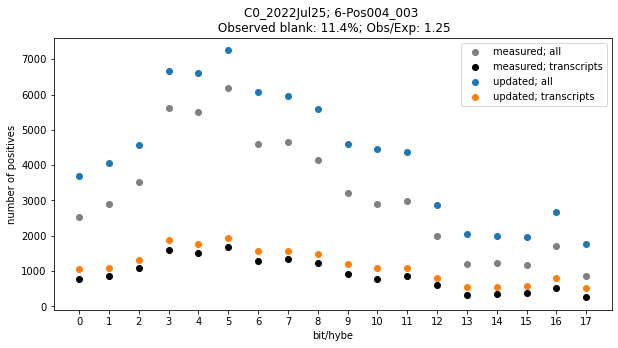

In [18]:
output = os.path.join(figdir, f'fig3-1_barcodes_{dataset}_{posname}.pdf')
logging.info(output)

fig, ax = plt.subplots(figsize=(10,5))
val = measured_barcodes.sum(axis=0).astype(int)
ax.plot(val, 'o', color='gray', label='measured; all')

val = measured_barcodes[transcripts_idx].sum(axis=0).astype(int)
ax.plot(val, 'o', color='k', label='measured; transcripts')

val = updated_measured_barcodes.sum(axis=0).astype(int)
ax.plot(val, 'o', label='updated; all')

val = updated_measured_barcodes[transcripts_idx].sum(axis=0).astype(int)
ax.plot(val, 'o', label='updated; transcripts')
ax.set_title(f'{dataset}; {posname} \n Observed blank: {100*obs_blank:.1f}%; Obs/Exp: {obsoverexp_blank:.2f}')

ax.set_xticks(np.arange(18))
ax.set_xlabel('bit/hybe')
ax.set_ylabel('number of positives')
ax.legend(bbox_to_anchor=(1,1))
savefig_autodate(fig, output)
plt.show()

2022-08-26 11:34:49,813 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig3-2_barcodes_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig3-2_barcodes_C0_2022Jul25_6-Pos004_003_2022-08-26.pdf


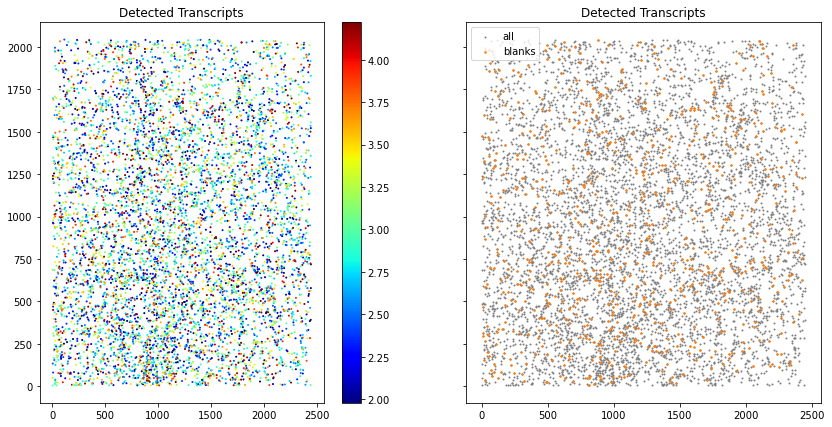

In [19]:
output = os.path.join(figdir, f'fig3-2_barcodes_{dataset}_{posname}.pdf')
logging.info(output)

fig, axs = plt.subplots(1,2,figsize=(7*2,7), sharex=True, sharey=True)
ax = axs[0]
ax.set_title('Detected Transcripts')
c=transcripts['signal-noise']
vmin,vmax= np.percentile(c, [5,95])
g = ax.scatter(transcripts.x,
               transcripts.y,
               c=c,
               s=1,
               vmin=vmin,
               vmax=vmax,
               cmap='jet', 
               rasterized=True,
              )
fig.colorbar(g, ax=ax)

ax = axs[1]
ax.set_title('Detected Transcripts')
ax.scatter(transcripts.x,
           transcripts.y,
           c='gray',
           s=1,
           label='all',
           rasterized=True,
          )
ax.scatter(A.x,
           A.y,
           c='C1',
           s=2,
           rasterized=True,
           label='blanks',
           )
ax.legend()
savefig_autodate(fig, output)
plt.show()
